In [143]:
import pydytuesday

# pydytuesday.get_date('2025-08-19')

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyfonts import load_google_font

jost_font = load_google_font("Jost")

In [145]:
munros = pd.read_csv("scottish_munros.csv")
print(munros.head())

  DoBIH_number            Name  Height_m  Height_ft    xcoord    ycoord  \
0            1     Ben Chonzie     931.0     3054.0  277324.0  730857.0   
1           17     Ben Vorlich     985.3     3233.0  262912.0  718916.0   
2           18  Stuc a' Chroin     973.0     3192.0  261746.0  717465.0   
3           32      Ben Lomond     973.7     3195.0  236707.0  702863.0   
4           26        Ben More    1174.0     3852.0  243276.0  724417.0   

    1891   1921   1933   1953   1969   1974   1981   1984   1990   1997  \
0  Munro  Munro  Munro  Munro  Munro  Munro  Munro  Munro  Munro  Munro   
1  Munro  Munro  Munro  Munro  Munro  Munro  Munro  Munro  Munro  Munro   
2  Munro  Munro  Munro  Munro  Munro  Munro  Munro  Munro  Munro  Munro   
3  Munro  Munro  Munro  Munro  Munro  Munro  Munro  Munro  Munro  Munro   
4  Munro  Munro  Munro  Munro  Munro  Munro  Munro  Munro  Munro  Munro   

    2021 Comments  
0  Munro      NaN  
1  Munro      NaN  
2  Munro      NaN  
3  Munro      NaN 

In [146]:
print(munros[["Name", "Height_m", "xcoord", "ycoord"]])
print(munros[["Name", "Height_m"]].sort_values(by = "Height_m", ascending = False))
print(munros.shape)

                       Name  Height_m    xcoord    ycoord
0               Ben Chonzie     931.0  277324.0  730857.0
1               Ben Vorlich     985.3  262912.0  718916.0
2            Stuc a' Chroin     973.0  261746.0  717465.0
3                Ben Lomond     973.7  236707.0  702863.0
4                  Ben More    1174.0  243276.0  724417.0
..                      ...       ...       ...       ...
599           Sgurr nan Eag     926.3  145705.0  819536.0
600  Blabheinn [Bla Bheinn]     929.0  152990.0  821743.0
601     Blabheinn South Top     926.5  152855.0  821529.0
602                Ben More     966.0  152576.0  733078.0
603                     NaN       NaN       NaN       NaN

[604 rows x 4 columns]
                                 Name  Height_m
132                         Ben Nevis   1344.53
297       Ben Macdui [Beinn Macduibh]   1309.00
283                         Braeriach   1296.00
298              Ben Macdui North Top   1295.00
288                        Cairn Toul   

<Axes: xlabel='Name', ylabel='Height_m'>

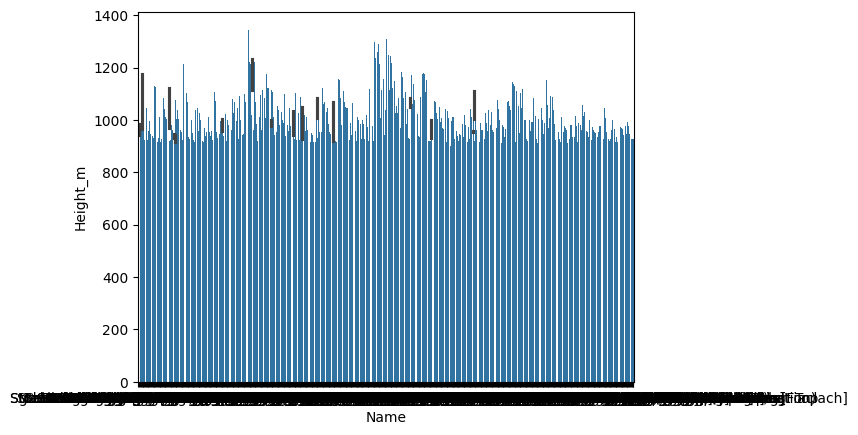

In [147]:
sns.barplot(y = "Height_m", x = "Name", data = munros)

In [148]:
latest_munros = munros[["Name", "Height_m", "Height_ft", "xcoord", "ycoord", "2021"]].copy()
latest_munros = latest_munros[latest_munros["Height_ft"] >= 3000]
latest_munros["2021"] = latest_munros["2021"].astype("category")

print(latest_munros.head())
print(latest_munros.info())

             Name  Height_m  Height_ft    xcoord    ycoord   2021
0     Ben Chonzie     931.0     3054.0  277324.0  730857.0  Munro
1     Ben Vorlich     985.3     3233.0  262912.0  718916.0  Munro
2  Stuc a' Chroin     973.0     3192.0  261746.0  717465.0  Munro
3      Ben Lomond     973.7     3195.0  236707.0  702863.0  Munro
4        Ben More    1174.0     3852.0  243276.0  724417.0  Munro
<class 'pandas.core.frame.DataFrame'>
Index: 593 entries, 0 to 602
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Name       593 non-null    object  
 1   Height_m   593 non-null    float64 
 2   Height_ft  593 non-null    float64 
 3   xcoord     593 non-null    float64 
 4   ycoord     593 non-null    float64 
 5   2021       508 non-null    category
dtypes: category(1), float64(4), object(1)
memory usage: 28.5+ KB
None


In [149]:
print(latest_munros["Height_m"].sort_values(ascending = False))
print(latest_munros["Height_m"].value_counts(ascending= False))
print(latest_munros["2021"].value_counts(ascending= False))
# print(latest_munros[["Height_m"]].isna())

132    1344.53
297    1309.00
283    1296.00
298    1295.00
288    1291.00
        ...   
512     915.40
240     915.30
211     914.60
371     914.60
68      914.30
Name: Height_m, Length: 593, dtype: float64
Height_m
927.0    6
918.0    6
942.0    5
963.0    5
974.0    5
        ..
941.4    1
940.1    1
937.9    1
932.2    1
973.7    1
Name: count, Length: 404, dtype: int64
2021
Munro        282
Munro Top    226
Name: count, dtype: int64


I want to visualize all the heights in my dataset (without it loooking cluttered) on the vertical axis, and the remoteness from residences on the horizontal. To do this, I have to calculate the distance of each 604 coordinates from their respective closest residences, which may be challenging.

I think I will just overlay their heights on a map.

In [150]:
import geopandas as gpd

scotland = gpd.read_file("map_data/All_Scotland_wards_4th.shp")
print(scotland)

       CODE  Ward_No      Review        Council   ONS_2010  \
0    00QAMM       12  4th review  Aberdeen City  S13002487   
1    00QAMA        1  4th review  Aberdeen City  S13002476   
2    00QAMJ        9  4th review  Aberdeen City  S13002484   
3    00QAMK       10  4th review  Aberdeen City  S13002485   
4    00QAMC        3  4th review  Aberdeen City  S13002478   
..      ...      ...         ...            ...        ...   
348  00RHMH        8  4th review   West Lothian  S13002827   
349  00RHMG        7  4th review   West Lothian  S13002826   
350  00RHMD        4  4th review   West Lothian  S13002823   
351  00RHMC        3  4th review   West Lothian  S13002822   
352  00RHMB        2  4th review   West Lothian  S13002821   

                                  Name  \
0                    Torry / Ferryhill   
1         Dyce / Bucksburn / Danestone   
2                        Lower Deeside   
3    Hazlehead / Ashley / Queens Cross   
4            Kingswells / Sheddocksley   
.. 

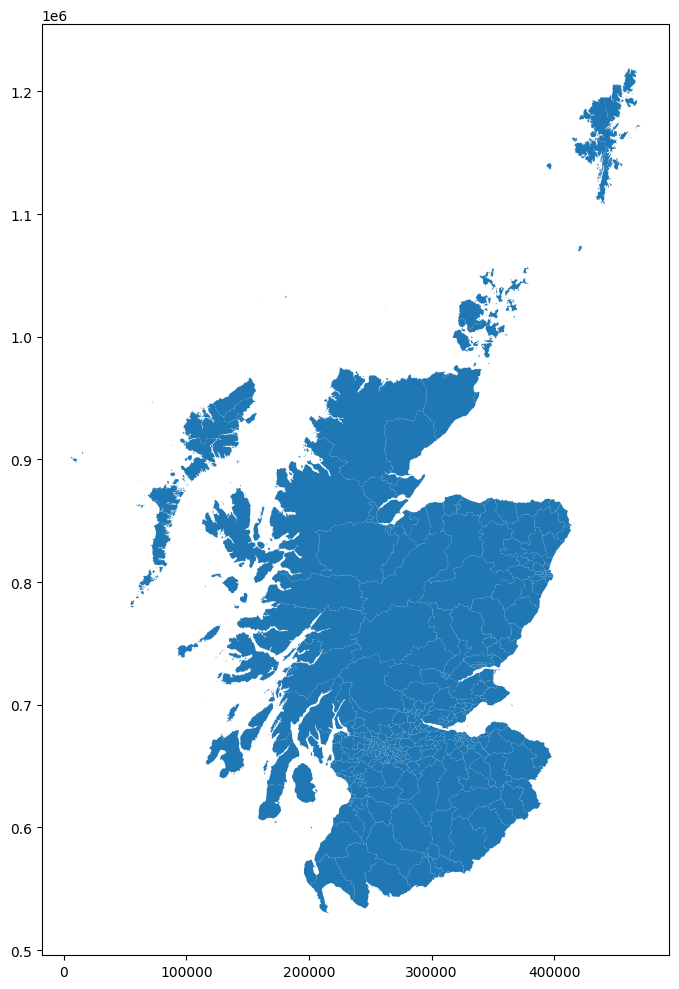

In [151]:
fig, ax = plt.subplots(figsize=(10, 10))

scotland.plot(ax=ax)

plt.tight_layout()
plt.show()

Now that I have Scotland's map, I need to overlay the points of all the different Munros, and color them by their height ranges.
I will need a subplot to do that.

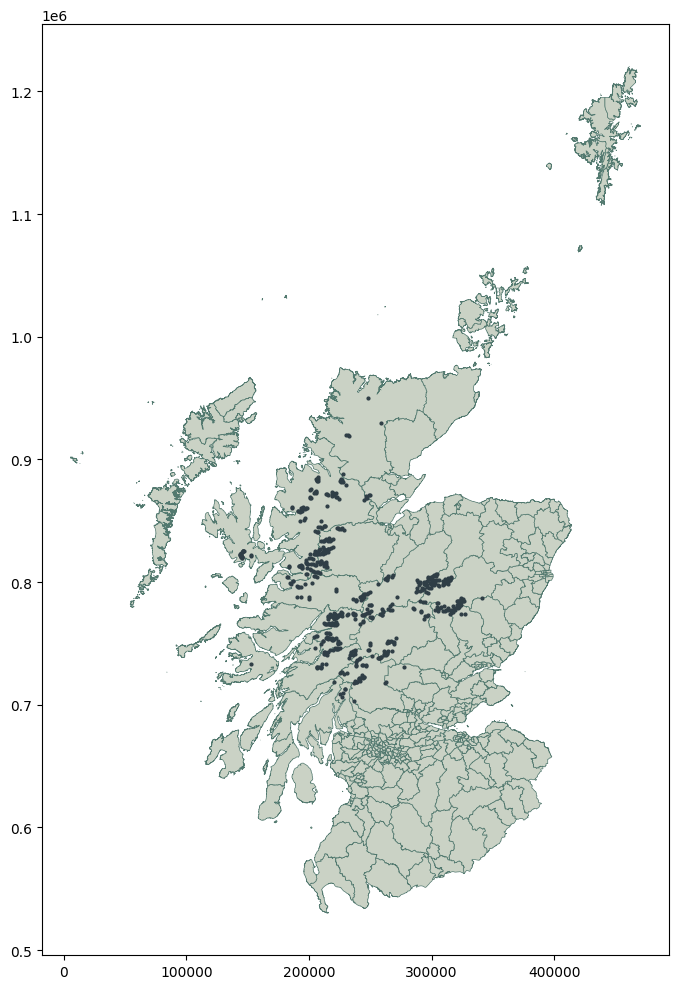

In [152]:
fig, ax = plt.subplots(figsize=(10, 10))

scotland.plot(ax=ax, edgecolor="#52796f", color = "#cad2c5", linewidth= 0.5)

ax.scatter(
    x = "xcoord",
    y = "ycoord",
    data = latest_munros,
    color = "#2f3e46",
    s = 4
)

plt.tight_layout()
plt.show()

Not bad. Now, in addition to (or instead of) coloring the points by height, I can say:
1. These are the Munro in the most or least populated states in Scotland
2. These are the states that do or do not have a Munro within
3. So and so many people have to leave their state to see a Munro OR this percentage of people can see a Munro in their state


For every point that is overlaid on the plot, in the second plot (I am making two plots: A main and a supporting), I want to color the state beneath differently. 

In [153]:
world = gpd.read_file("map_data/admin_0_countries/ne_110m_admin_0_countries.shp")
states = gpd.read_file("map_data/admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp")
uk = states[states["admin"] == "United Kingdom"]
# print(f"{borderless_scotland=}")
# print(states[states["admin"] == "United Kingdom"][["name", "admin"]])
for col in uk.columns:
    print(col)
    print("ITS CONTENT:")
    print(uk[col])
borderless_scotland = uk[uk["geonunit"] == "Scotland"]
print(borderless_scotland)


featurecla
ITS CONTENT:
314     Admin-1 states provinces
315     Admin-1 states provinces
316     Admin-1 states provinces
320     Admin-1 states provinces
321     Admin-1 states provinces
                  ...           
4527    Admin-1 states provinces
4528    Admin-1 states provinces
4529    Admin-1 states provinces
4530    Admin-1 states provinces
4531    Admin-1 states provinces
Name: featurecla, Length: 232, dtype: object
scalerank
ITS CONTENT:
314     8
315     8
316     8
320     8
321     8
       ..
4527    8
4528    8
4529    8
4530    8
4531    8
Name: scalerank, Length: 232, dtype: int32
adm1_code
ITS CONTENT:
314     GBR-2083
315     GBR-2135
316     GBR-2136
320     GBR-2089
321     GBR-2085
          ...   
4527    GBR-5690
4528    GBR-5691
4529    GBR-5692
4530    GBR-5694
4531    GBR-5693
Name: adm1_code, Length: 232, dtype: object
diss_me
ITS CONTENT:
314     2083
315     2135
316     2136
320     2089
321     2085
        ... 
4527    5690
4528    5691
4529    5692


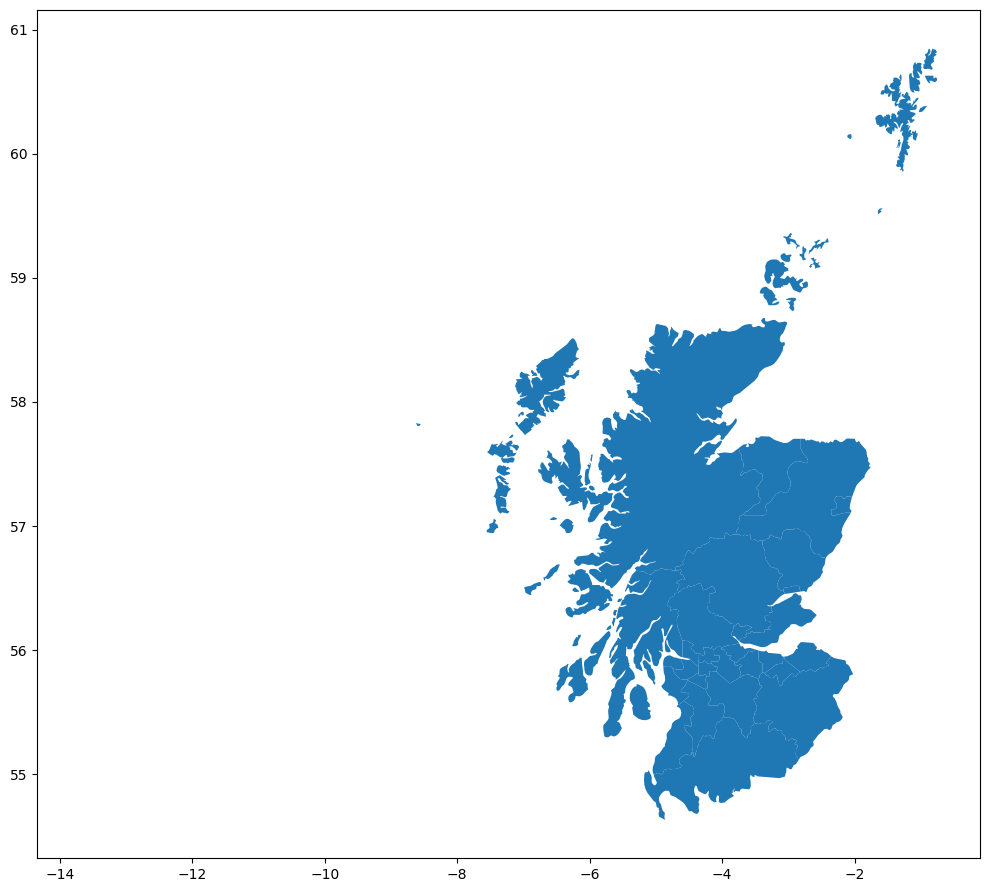

In [154]:
fig, ax = plt.subplots(figsize=(10, 10))

borderless_scotland.plot(ax=ax)

plt.tight_layout()
plt.show()

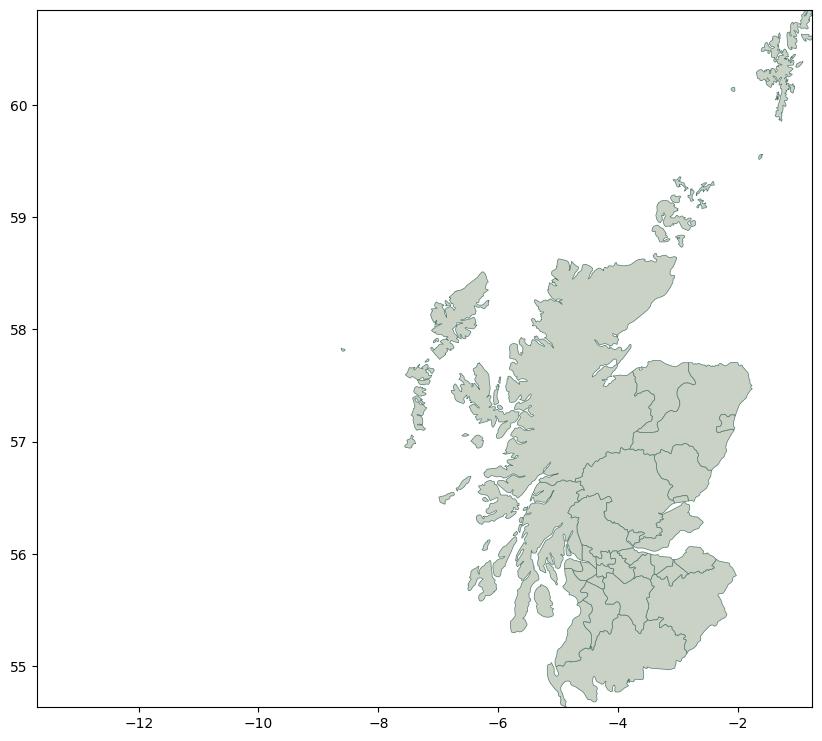

In [155]:
fig, ax = plt.subplots(figsize=(10, 10))

borderless_scotland.plot(ax=ax, edgecolor="#52796f", color = "#cad2c5", linewidth= 0.5)

ax.scatter(
    x = "xcoord",
    y = "ycoord",
    data = latest_munros,
    color = "#2f3e46",
    s = 4,
)

ax.set_xlim(borderless_scotland.total_bounds[0], borderless_scotland.total_bounds[2])
ax.set_ylim(borderless_scotland.total_bounds[1], borderless_scotland.total_bounds[3])
plt.show()

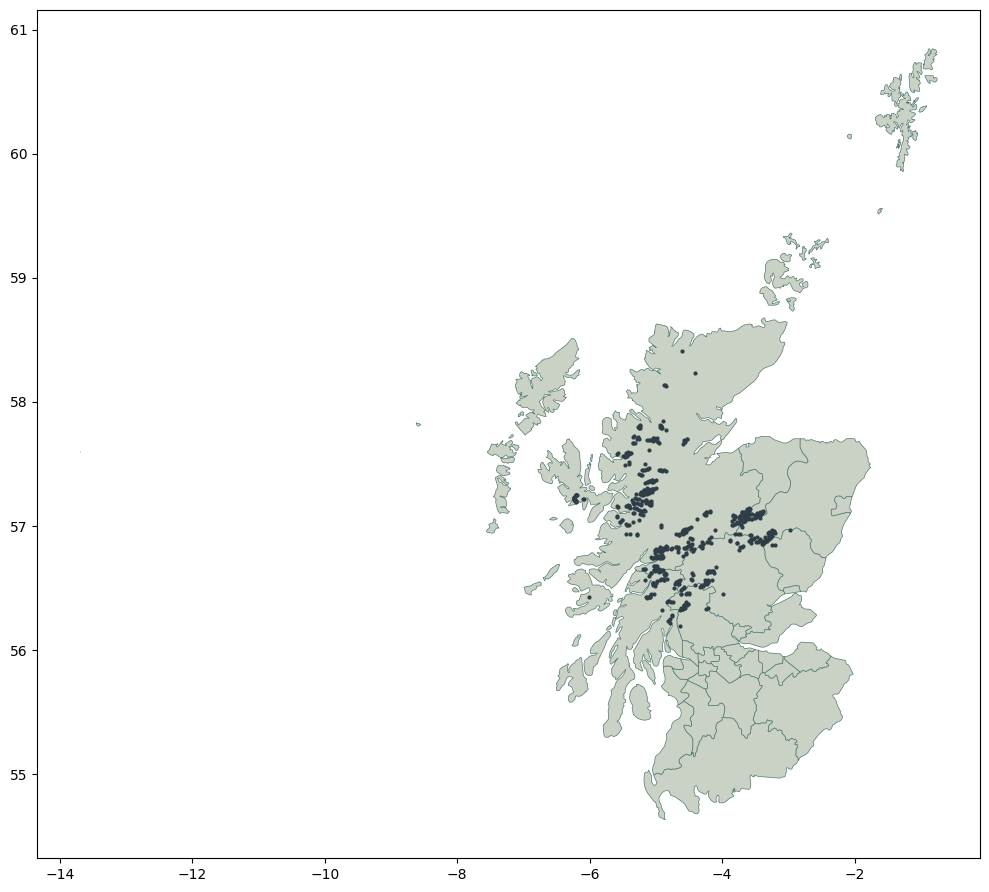

In [156]:
# from shapely.geometry import Point

munros_gdf = gpd.GeoDataFrame(
    latest_munros,
    geometry=gpd.points_from_xy(latest_munros["xcoord"], latest_munros["ycoord"]),
    crs="EPSG:27700"   # British National Grid
)

# Reproject to match Scotland map (likely WGS84 lat/lon EPSG:4326)
munros_gdf = munros_gdf.to_crs(borderless_scotland.crs)

munros_gdf["lon"] = munros_gdf.geometry.x
munros_gdf["lat"] = munros_gdf.geometry.y

fig, ax = plt.subplots(figsize=(10, 10))
borderless_scotland.plot(ax=ax, edgecolor="#52796f", color="#cad2c5", linewidth=0.5)

ax.scatter(
    x = "lon",
    y = "lat",
    data = munros_gdf,
    color = "#2f3e46",
    s = 4,
)

plt.tight_layout()
plt.show()

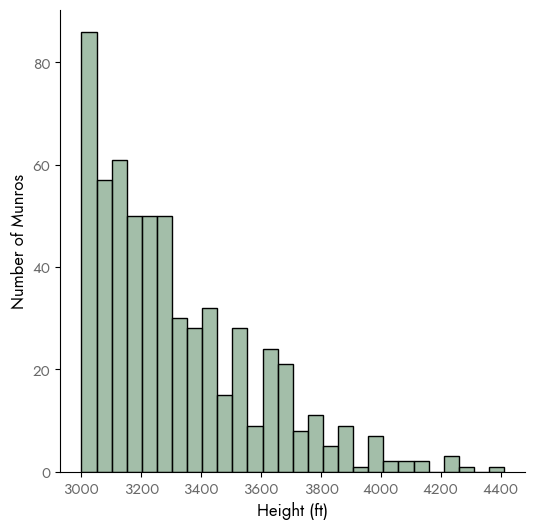

In [174]:
fig, ax = plt.subplots(figsize = (6, 6))

ax = sns.histplot(
    x = "Height_ft",
    data = latest_munros,
    binwidth= 50,
    color = "#84a98c",
    ec = "black"
)

ax.set_xlabel("Height (ft)", fontproperties = jost_font, fontsize = 12)
ax.set_ylabel("Number of Munros", fontproperties = jost_font, fontsize = 12)

for label in ax.get_xticklabels():
    label.set_fontproperties(jost_font)
    label.set_fontsize(11)
    label.set_color("dimgray")

for label in ax.get_yticklabels():
    label.set_fontproperties(jost_font)
    label.set_fontsize(11)
    label.set_color("dimgray")

sns.despine()
plt.show()